In [252]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import svm
import seaborn as sns
import scikitplot as skplt
import joblib
from scipy.stats import uniform as sp_rand

In [253]:
cnb = joblib.load('../models/cnb.pkl')

In [254]:
df = pd.read_csv('../data/The-Office-Lines-V3.csv', encoding='latin-1')

In [255]:
df['line'] = df['line'].str.lower()
speakers = []
for i in df.speaker.value_counts().head(22).index:
    speakers.append(i)

In [256]:
speakers

['Michael',
 'Dwight',
 'Jim',
 'Pam',
 'Andy',
 'Kevin',
 'Angela',
 'Erin',
 'Oscar',
 'Ryan',
 'Darryl',
 'Phyllis',
 'Kelly',
 'Toby',
 'Jan',
 'Stanley',
 'Meredith',
 'Holly',
 'Nellie',
 'Gabe',
 'Robert',
 'Creed']

In [257]:
speaker_extras = ["'", 'and', '&', '/', 'as', ',']

In [258]:
df = df[df.speaker.str.match('|'.join(speakers))]
df.drop(df[df.speaker.str.contains('|'.join(speaker_extras))].index, inplace=True)

In [259]:
df['speaker'] = df.speaker.str.replace(': ','')
df['speaker'] = df.speaker.str.replace(':','')
df['speaker'] = df.speaker.str.replace('.','')
df['speaker'] = df.speaker.str.replace('Dwight ','Dwight')
df['speaker'] = df.speaker.str.replace('Michael ','Michael')
df['speaker'] = df.speaker.str.replace('DwightKSchrute','Dwight')
df['speaker'] = df.speaker.str.replace('Jim ','Jim')
df['speaker'] = df.speaker.str.replace('Pam ','Pam')
df['speaker'] = df.speaker.str.replace('Robert California','Robert')
df['speaker'] = df.speaker.str.replace('Nellie Bertram','Nellie')

In [260]:
df.drop(df[df.speaker=='Ryan Howard'].index, inplace=True)
df.drop(df[df.speaker=='Robert Dunder'].index, inplace=True)
df.drop(df[df.speaker=='Gabe'].index, inplace=True)
df.drop(df[df.speaker=='Holly'].index, inplace=True)
df.drop(df[df.speaker=='Kelly'].index, inplace=True)
df.drop(df[df.speaker=='Meredith'].index, inplace=True)
df.drop(df[df.speaker=='Nellie'].index, inplace=True)
df.drop(df[df.speaker=='Oscar'].index, inplace=True)
df.drop(df[df.speaker=='Phyllis'].index, inplace=True)
df.drop(df[df.speaker=='Toby'].index, inplace=True)
df.drop(df[df.speaker=='Jan'].index, inplace=True)
df.drop(df[df.speaker=='Erin'].index, inplace=True)
df.drop(df[df.speaker=='Robert'].index, inplace=True)
df.drop(df[df.speaker=='Ryan'].index, inplace=True)

In [261]:
df.speaker.value_counts()

Michael    10850
Dwight      6793
Jim         6257
Pam         5005
Andy        3733
Angela      1551
Kevin       1542
Darryl      1170
Stanley      672
Creed        395
Name: speaker, dtype: int64

In [262]:
X = df.line
y = df.speaker
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [263]:
count_vect = CountVectorizer(stop_words='english', decode_error='replace')
X_train_counts = count_vect.fit_transform(X_train)

In [276]:
# joblib.dump(count_vect.vocabulary_, '../models/searchcountVec.pkl')

['../models/searchcountVec.pkl']

In [265]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [266]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [267]:
print(X_test_counts.shape)
print(X_test_tfidf.shape)

(7594, 14581)
(7594, 14581)


In [268]:
param_grid = {'alpha': sp_rand()}

In [269]:
rsearch = RandomizedSearchCV(estimator=cnb, param_distributions=param_grid, n_iter=1000)
search = rsearch.fit(X_train_tfidf, y_train)

In [275]:
# joblib.dump(search, '../models/search.pkl')

['../models/search.pkl']

In [271]:
print(search.best_score_)
print(search.best_estimator_.alpha)

0.29014946252732077
0.9996696741503358


In [272]:
pred = search.predict(X_test_tfidf)

In [273]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

        Andy       0.19      0.24      0.21       747
      Angela       0.24      0.11      0.15       310
       Creed       0.15      0.08      0.10        79
      Darryl       0.24      0.14      0.17       234
      Dwight       0.37      0.29      0.33      1359
         Jim       0.28      0.31      0.29      1252
       Kevin       0.14      0.08      0.10       308
     Michael       0.39      0.50      0.44      2170
         Pam       0.25      0.22      0.24      1001
     Stanley       0.11      0.04      0.06       134

    accuracy                           0.31      7594
   macro avg       0.24      0.20      0.21      7594
weighted avg       0.30      0.31      0.30      7594



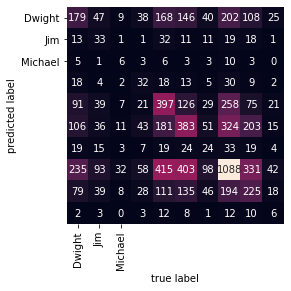

In [274]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Dwight', 'Jim', 'Michael'], yticklabels=['Dwight', 'Jim', 'Michael'])
plt.xlabel('true label')
plt.ylabel('predicted label');